In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

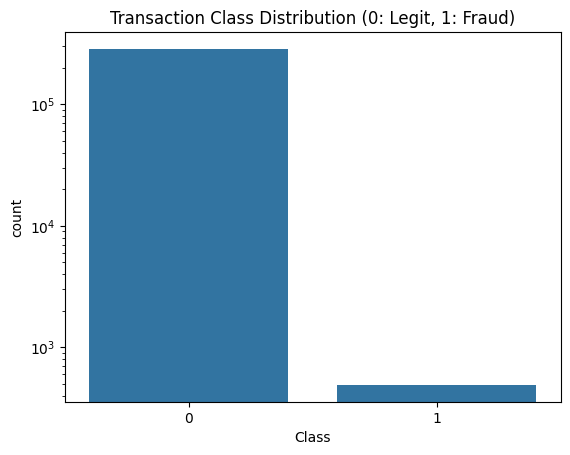

In [4]:
sns.countplot( x = 'Class', data = df)
plt.title('Transaction Class Distribution (0: Legit, 1: Fraud)')
plt.yscale('log') # Use log scale because fraud is so tiny it won't show up otherwise
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Amount','Time'], axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE, count of '1' (Fraud):", sum(y_train == 1))
print("Before SMOTE, count of '0' (Legit):", sum(y_train == 0))

print("\nAfter SMOTE, count of '1' (Fraud):", sum(y_train_res == 1))
print("After SMOTE, count of '0' (Legit):", sum(y_train_res == 0))

Before SMOTE, count of '1' (Fraud): 344
Before SMOTE, count of '0' (Legit): 199020

After SMOTE, count of '1' (Fraud): 199020
After SMOTE, count of '0' (Legit): 199020


In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_res, y_train_res)

y_pred = log_reg.predict(X_test)

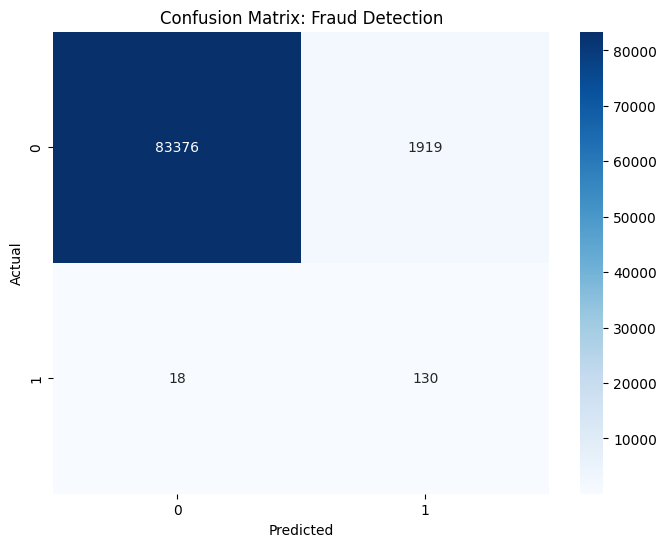

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Create the matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Fraud Detection')
plt.show()

# 3. See the detailed "Recall" score
print(classification_report(y_test, y_pred))

In [10]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Forest (100 trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train on the BALANCED data
rf_model.fit(X_train_res, y_train_res)

# 3. Predict
y_pred_rf = rf_model.predict(X_test)

# 4. Check results
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.78      0.81       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



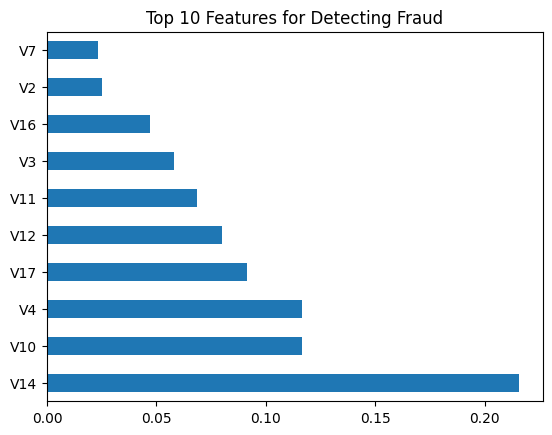

In [11]:
# See which "V" features were most suspicious
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features for Detecting Fraud')
plt.show()

In [12]:

# index [:, 1] gives the probability of being 'Fraud'
y_probs = rf_model.predict_proba(X_test)[:, 1]

# 2. Set a more "paranoid" threshold (e.g., 30%)
lower_threshold = 0.3
y_pred_tuned = (y_probs >= lower_threshold).astype(int)

# 3. Check the new Recall score
from sklearn.metrics import classification_report
print("Tuned Model Results (Threshold = 0.3):")
print(classification_report(y_test, y_pred_tuned))

Tuned Model Results (Threshold = 0.3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.83      0.78       148

    accuracy                           1.00     85443
   macro avg       0.87      0.92      0.89     85443
weighted avg       1.00      1.00      1.00     85443

